German Traffic Sign Recognition Benchmark (GTSRB)
=================================================
---
Introduction au Deep Learning  (IDLE) - S. Aria, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020

## Episode 3 : Tracking, visualizing and save models

Our main steps:
 - Monitoring and understanding our model training
 - Analyze the results 
 - Improving our model
 - Add recovery points


## 1/ Import and init

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import h5py
import matplotlib.pyplot as plt
import os, time, random

import idle.pwk as ooo
from importlib import reload

ooo.init()

IDLE 2020 - Practical Work Module
  Version            : 0.1.1
  Run time           : Thursday 9 January 2020, 17:47:30
  Matplotlib style   : idle/talk.mplstyle
  TensorFlow version : 2.0.0
  Keras version      : 2.2.4-tf


## 2/ Reload dataset
Dataset is one of the saved dataset: RGB25, RGB35, L25, L35, etc.  
First of all, we're going to use the dataset : **L25**  
(with a GPU, it only takes 35'' compared to more than 5' with a CPU !)

In [5]:
%%time

dataset ='set-24x24-L'

# ---- Read dataset
#
filename='./data/'+dataset+'.h5'
with  h5py.File(filename) as f:
    x_train = f['x_train'][:]
    y_train = f['y_train'][:]
    x_test  = f['x_test'][:]
    y_test  = f['y_test'][:]

# ---- Dataset shape
#
(n,lx,ly,lz) = x_train.shape
data_shape   = (lx, ly, lz)

# ---- done
print('Dataset loaded ({:.1f} Mo)\n'.format(os.path.getsize(filename)/(1024*1024)))

Dataset loaded (228.2 Mo)

CPU times: user 0 ns, sys: 281 ms, total: 281 ms
Wall time: 304 ms


## 3/ Have a look to the dataset
Note: Data must be reshape for matplotlib

x_train :  (39209, 24, 24, 1)
y_train :  (39209,)
x_test  :  (12630, 24, 24, 1)
y_test  :  (12630,)


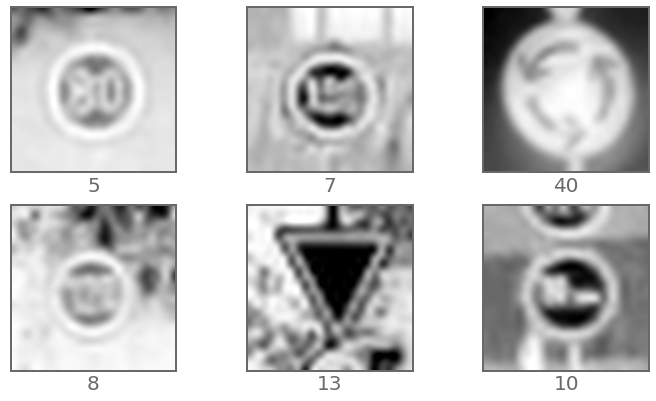

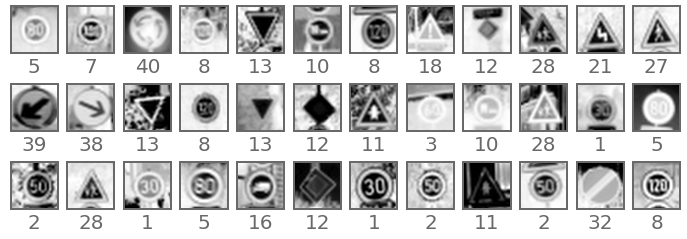

In [6]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)

ooo.plot_images(x_train, y_train, range(6),  columns=3,  x_size=4, y_size=3)
ooo.plot_images(x_train, y_train, range(36), columns=12, x_size=1, y_size=1)
